In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Load the World Bank CSV

In [ ]:

df = pd.read_csv('world_bank_data.csv', skiprows=4)

In [ ]:

print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')


# Melt the data: years go from columns to rows

In [ ]:

df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name='Year', value_name='Value')

# Convert Year and Value to numeric

In [ ]:

df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Drop missing values

In [ ]:

df_long = df_long.dropna()

# Filter for a country and indicator

In [ ]:

country = 'India'
indicator = 'GDP (current US$)'

# Plot historical data

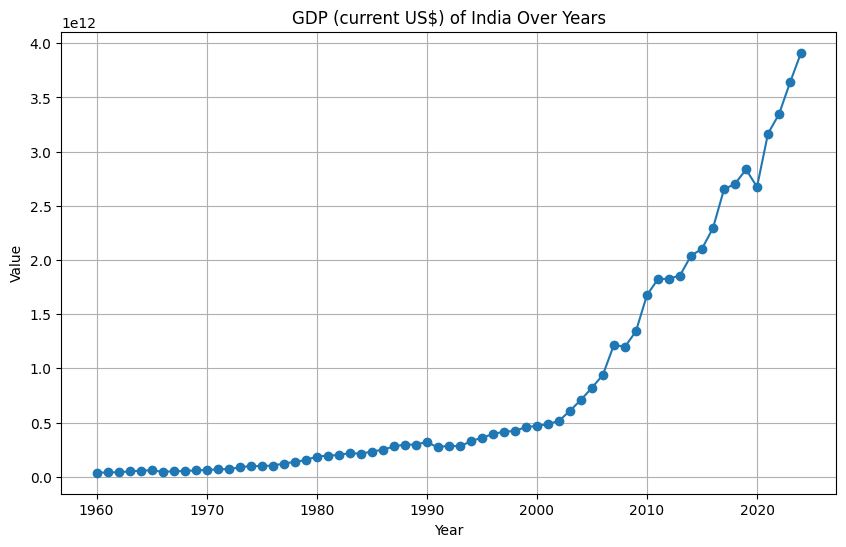

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data, marker='o')
plt.title(f'{indicator} of {country} Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Stationarity check

In [ ]:

result = adfuller(data['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.9064341151160815
p-value: 0.9985383004916053


# Fit ARIMA and forecast

In [ ]:
model = ARIMA(data, order=(1,1,1))  # You can tune p,d,q
model_fit = model.fit()
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = np.arange(data.index.max()+1, data.index.max()+1+forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

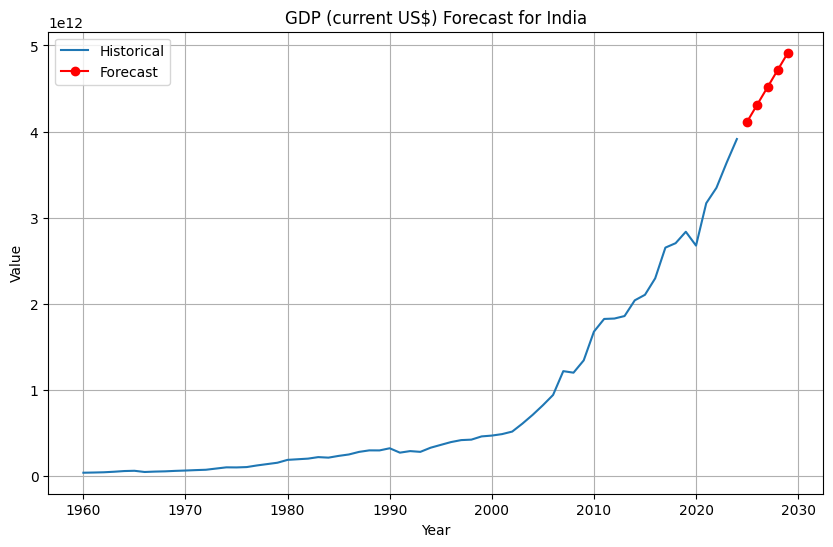

In [ ]:
# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(data, label='Historical')
plt.plot(forecast_years, forecast, marker='o', color='red', label='Forecast')
plt.title(f'{indicator} Forecast for {country}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()